In [4]:
!python main.py

 47%|████████████████▊                   | 28283/60548 [02:41<03:05, 174.13it/s]

In [ ]:
!python get_charactor.py

In [2]:
c = get_charactor()

100%|██████████| 1179479/1179479 [00:04<00:00, 252776.26it/s]


In [3]:
c

{'0': 1086229,
 '2': 263886,
 '4': 122689,
 '6': 105388,
 '8': 99890,
 '1': 335427,
 '.': 159192,
 '3': 85452,
 '5': 153419,
 'I': 16183,
 't': 112591,
 'a': 335834,
 'l': 105208,
 'y': 32081,
 'J': 14496,
 'm': 51013,
 'i': 196439,
 'c': 61251,
 'p': 32412,
 'n': 205356,
 'o': 159945,
 'r': 166458,
 'd': 79914,
 'K': 10966,
 'z': 10932,
 'k': 22630,
 'h': 49462,
 's': 95261,
 'e': 219591,
 'b': 35667,
 'u': 95342,
 'w': 20698,
 'g': 46682,
 'L': 22127,
 'v': 17598,
 '-': 14165,
 '9': 190872,
 '7': 63680,
 'A': 43036,
 'f': 14429,
 ' ': 90694,
 'R': 13364,
 '(': 2631,
 'W': 10771,
 'H': 10929,
 'O': 9285,
 ')': 2021,
 'S': 44081,
 'B': 24783,
 'M': 36741,
 'q': 3543,
 'G': 19516,
 'D': 14719,
 '&': 1702,
 'F': 11639,
 'P': 18767,
 'E': 19956,
 'C': 34175,
 'V': 6362,
 'T': 15961,
 'U': 10287,
 'N': 22949,
 'j': 4202,
 'Z': 3289,
 'Q': 966,
 'x': 4143,
 "'": 1146,
 ',': 11772,
 'Y': 2193,
 '/': 427,
 '+': 585,
 ':': 33,
 '\n': 170,
 '<': 10,
 '>': 8,
 '$': 199,
 '%': 706,
 '\\': 8,
 'X'

In [51]:
import numpy as np
from pathlib import Path
import lmdb
import six
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import japanize_matplotlib
import json
import cv2

In [52]:
imgs = []
jsons = []

In [53]:
ROOT_DIR = Path.cwd().parents[2]
EXP_NAME = Path.cwd().stem
LMDB_DIR = ROOT_DIR / 'data' / EXP_NAME / 'lmdb'

env = lmdb.open(str(LMDB_DIR), max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)

with env.begin(write=False) as txn:
    n_samples = int(txn.get('num-samples'.encode()))
    for i in tqdm(range(n_samples), total=n_samples):
        i += 1
        
        # image
        img_key = f'image-{str(i).zfill(8)}'.encode()
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')
        imgs.append(img)

        # json
        label_key = f'label-{str(i).zfill(8)}'.encode()
        label = txn.get(label_key).decode('utf-8')
        json_dict = json.loads(label)
        jsons.append(json_dict)
        break

  0%|          | 0/1179479 [00:00<?, ?it/s]


-0.06


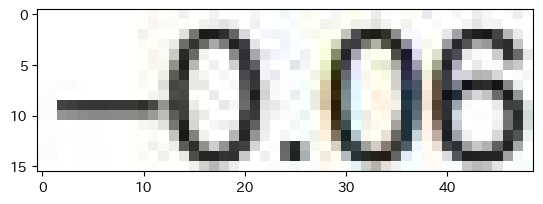

0.90


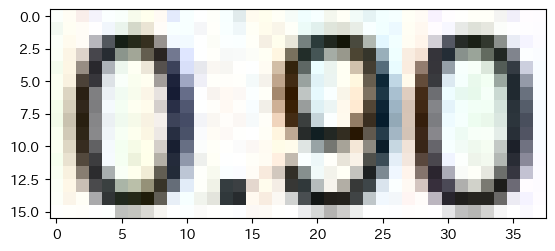

0.92


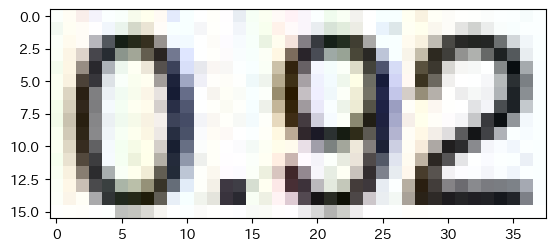

0.94


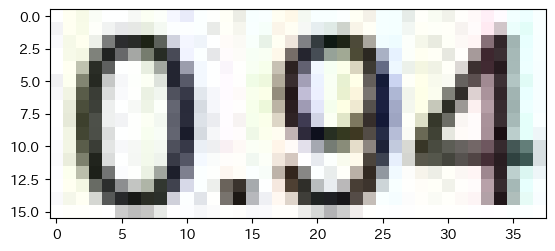

0.96


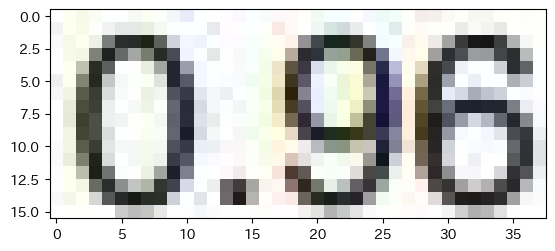

0.98


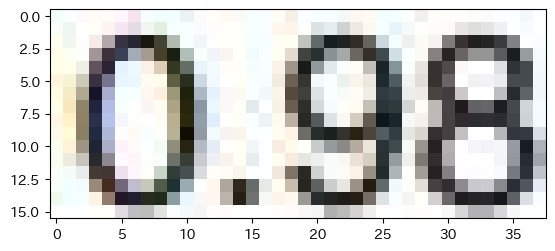

0


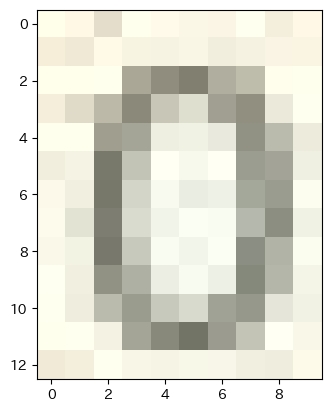

2


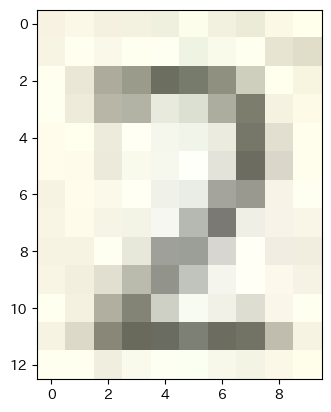

4


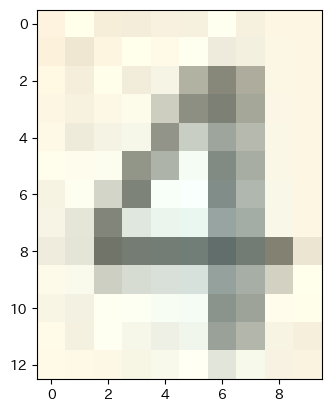

6


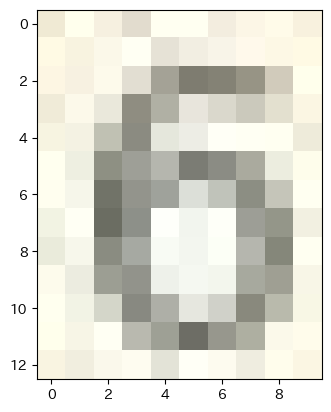

8


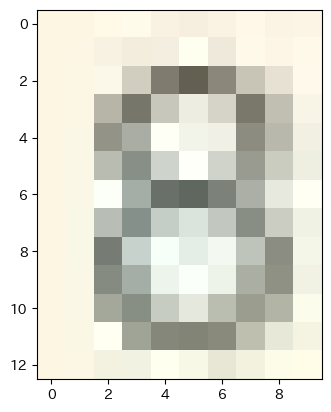

10


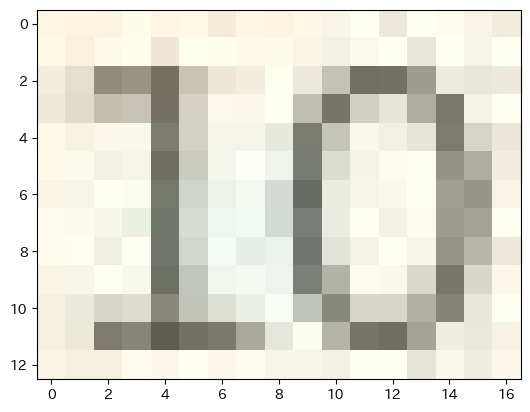

4.60


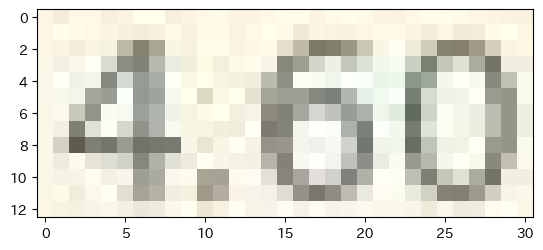

4.65


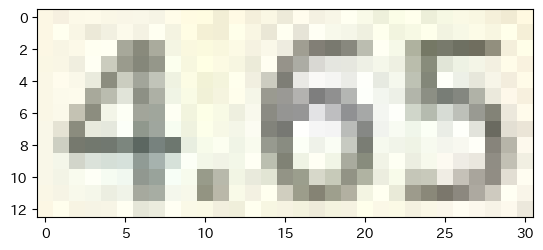

4.70


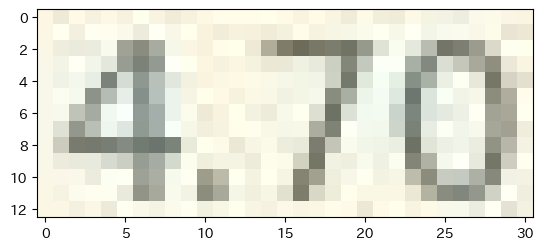

4.75


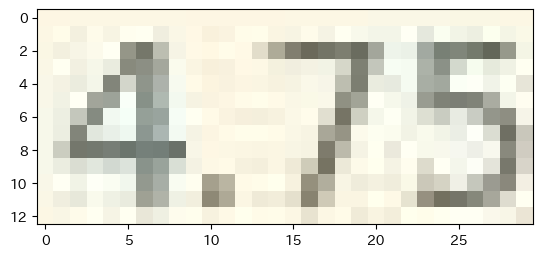

4.80


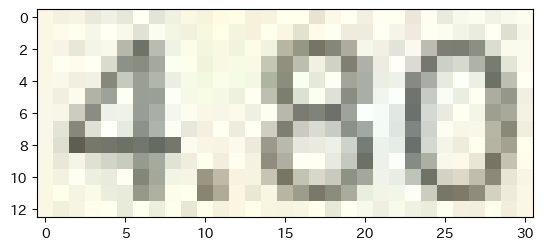

4.85


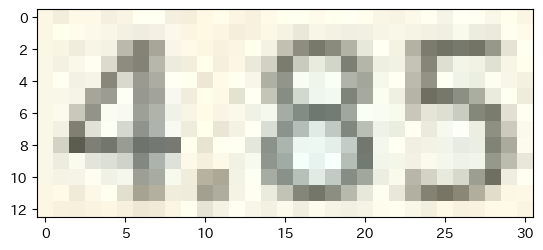

12


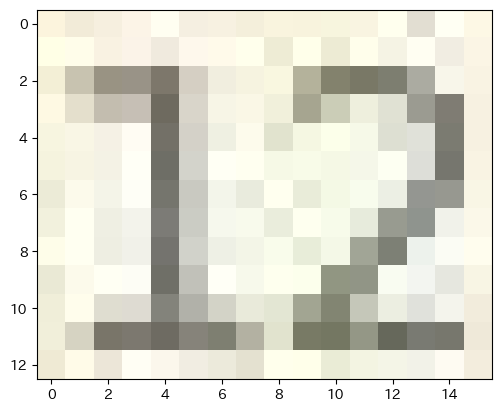

26


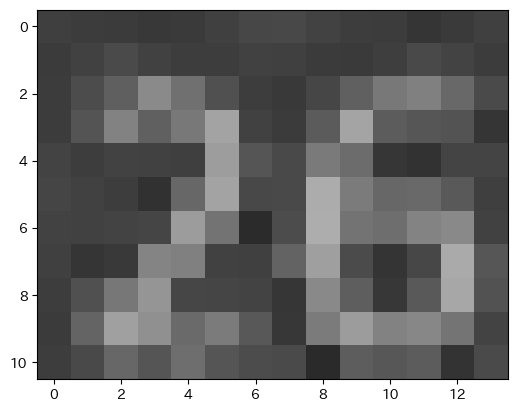

25.5


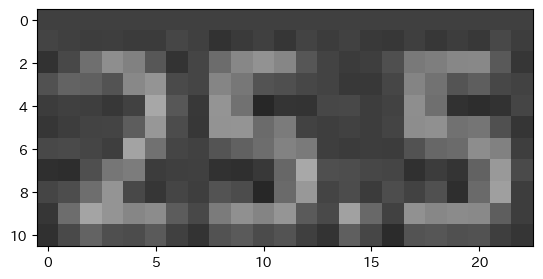

25


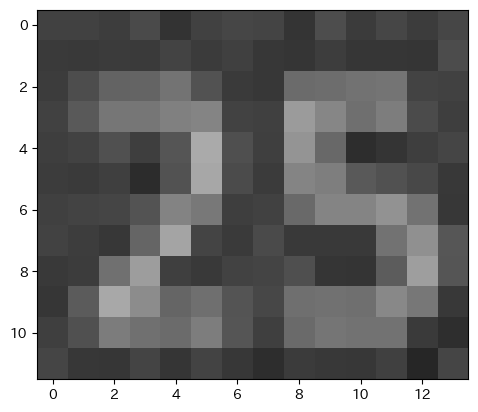

24.5


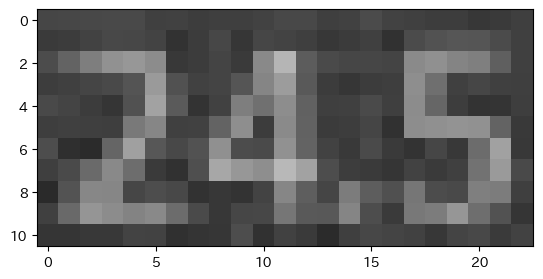

24


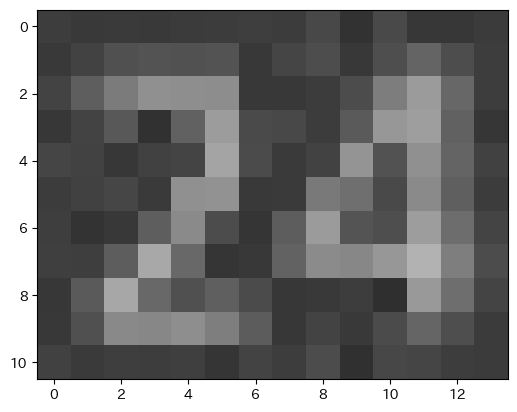

23.5


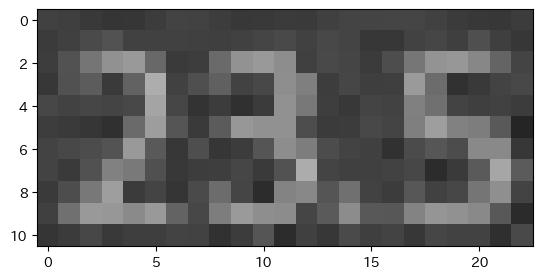

23


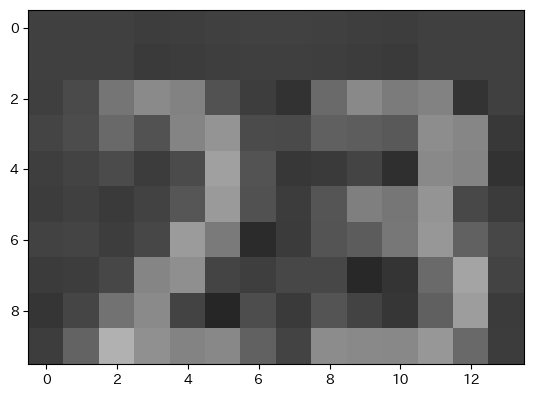

22.5


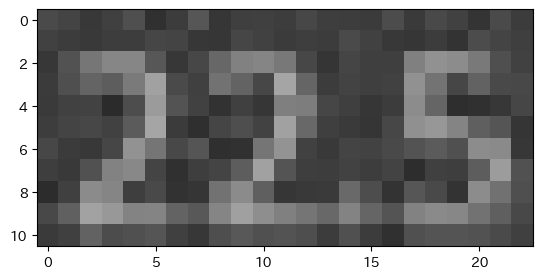

22


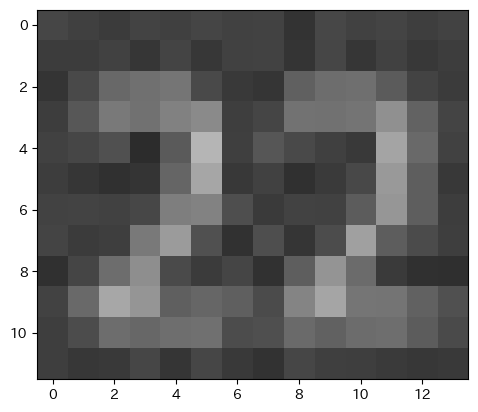

21.5


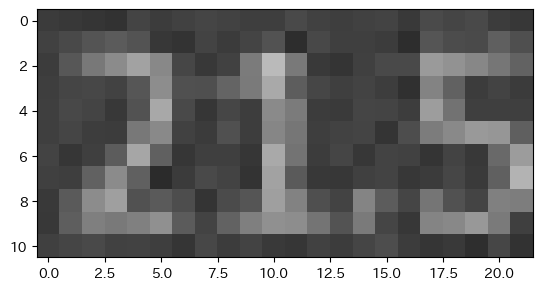

1985


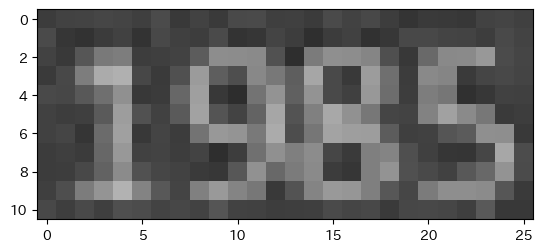

1990


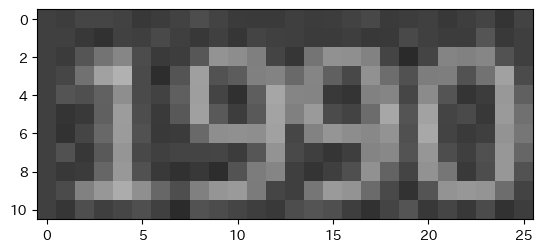

1995


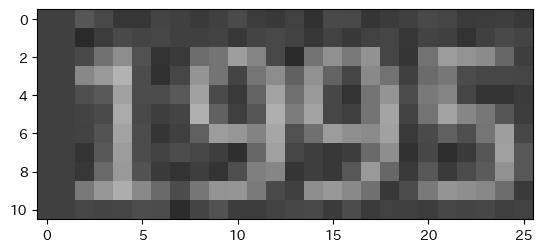

2000


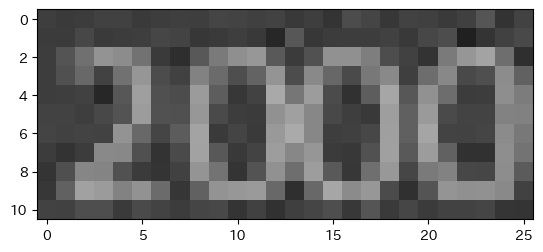

2005


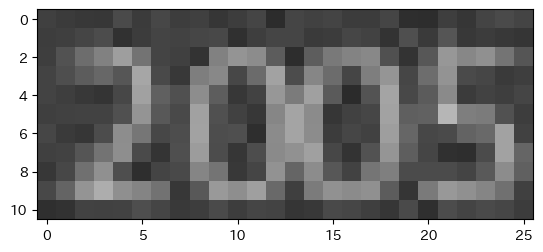

2010


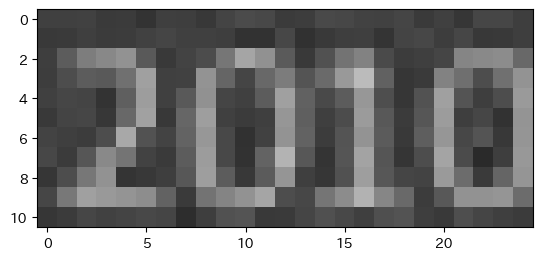

2015


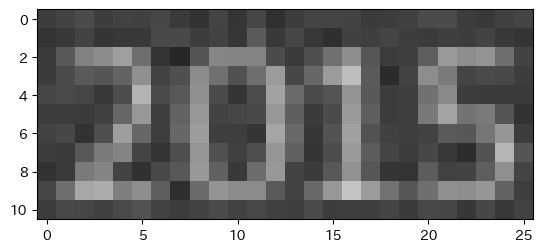

2020


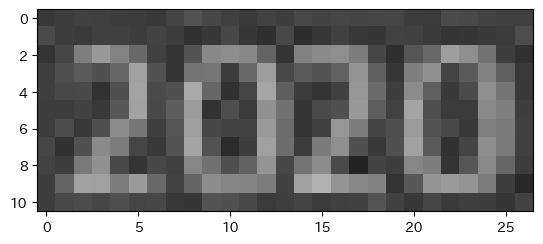

250.0


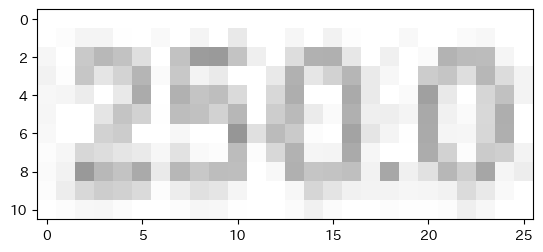

200.0


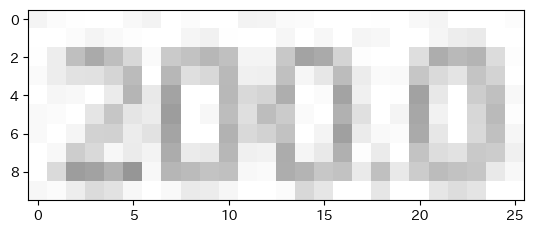

150.0


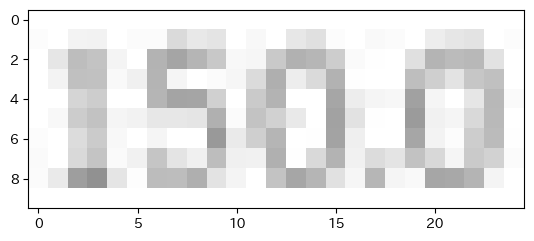

100.0


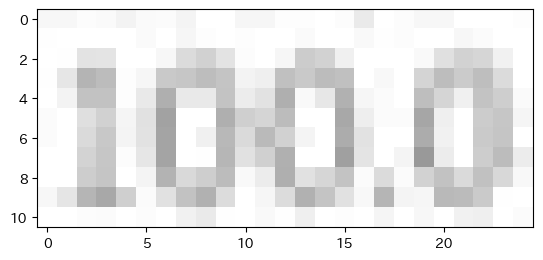

50.0


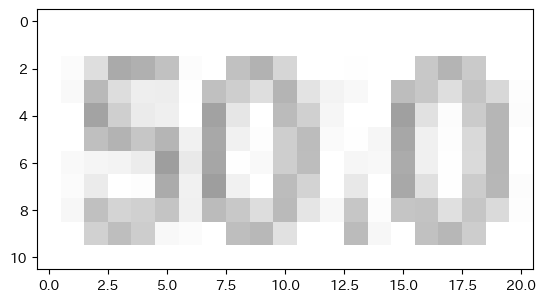

0.0


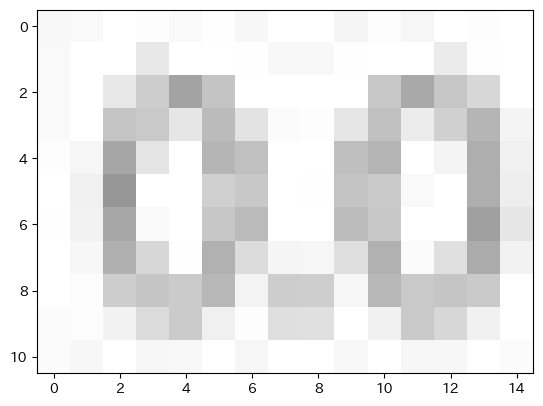

Afghanistan


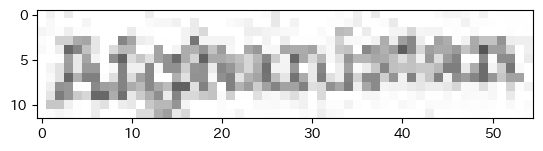

African Region (WHO)


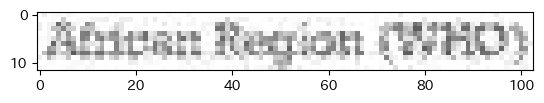

Albania


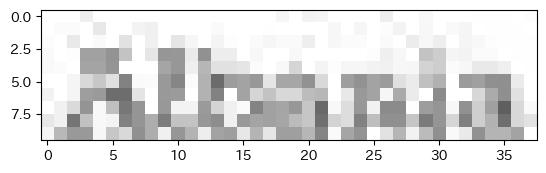

Algeria


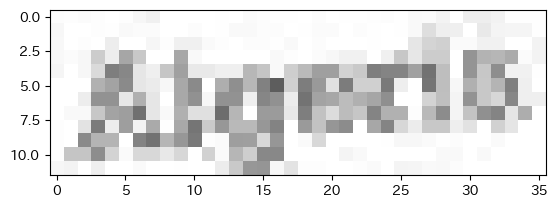

American Samoa


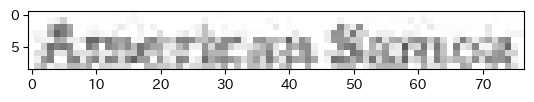

Andorra


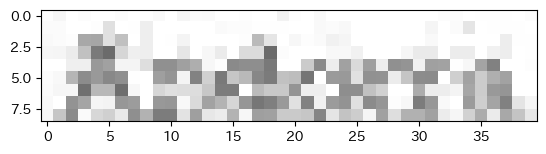

Angola


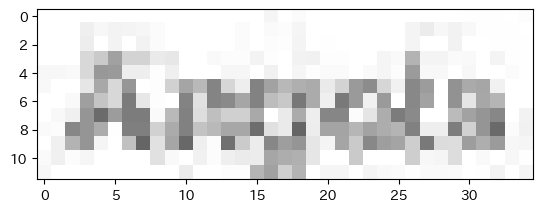

In [48]:
for i in range(50, 100):
    plt.imshow(imgs[i])
    print(jsons[i]['text'])
    plt.show()

{'id': '63834d0ee867',
 'text': '8.5',
 'polygon': {'x0': 79,
  'x1': 100,
  'x2': 100,
  'x3': 79,
  'y0': 425,
  'y1': 425,
  'y2': 437,
  'y3': 437},
 'img-size': {'height': 12, 'width': 21},
 'role': 'tick_label'}